In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mar-text/mar.txt
/kaggle/input/eng-mar/contraction_expansion.txt
/kaggle/input/eng-mar/cleaned.csv


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

### Getting one with data

In [ ]:
df = pd.read_table('/kaggle/input/mar-text/mar.txt',encoding='utf-8',  names=['English', 'Marathi', 'Attribution'])
df.head()

,English,Marathi,Attribution
0,Go.,जा.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Run!,पळ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,धाव!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,पळा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,धावा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46995 entries, 0 to 46994
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   English      46995 non-null  object
 1   Marathi      46995 non-null  object
 2   Attribution  46995 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(['Attribution'], axis=1, inplace=True)


In [ ]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

In [ ]:
def english_preprocessing(data, col):
    data[col] = data[col].astype(str)
    data[col] = data[col].apply(lambda x: x.lower())
    data[col] = data[col].apply(lambda x: re.sub("[^A-Za-z\s]","",x))   # all non-alphabetic characters

    data[col] = data[col].apply(lambda x: x.replace("\s+"," "))  # adjust multiple spaces
    data[col] = data[col].apply(lambda x: " ".join([word for word in x.split()]))

    return data


def marathi_preprocessing(data, col):
    data[col] = data[col].apply(lambda x: x.lower())
    data[col] = data[col].apply(lambda x: re.sub(r'\d','',x))  # replace all digits
    data[col] = data[col].apply(lambda x: re.sub(r'\s+',' ',x))
    data[col] = data[col].apply(lambda x: re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,।]", "", x))  # will replace all single characters in the square bracket
    data[col] = data[col].apply(lambda x: x.strip())
    data[col] = data[col].apply(lambda x: re.sub('[a-zA-Z]','',x))
    return data

In [ ]:
data = english_preprocessing(df,'English')
data = marathi_preprocessing(df,'Marathi')
data


,English,Marathi
0,go,जा
1,run,पळ
2,run,धाव
3,run,पळा
4,run,धावा
...,...,...
46990,just saying you dont like fish because of the ...,हड्डींमुळे मासे आवडत नाही असं म्हणणं हे काय मा...
46991,tom tried to sell his old vcr instead of throw...,टॉमने त्याचा जुना व्हीसीआर फेकून टाकण्याऐवजी व...
46992,january february march april may june july aug...,जानेवारी फेब्रुवारी मार्च एप्रिल मे जून जुलै ऑ...
46993,you cant view flash content on an ipad however...,आयपॅडवर फ्लॅश आशय बघता येत नाही पण तुम्ही त्या...


#### Contraction to expansion of english text
this contraction dictionary is combination from lot of places


In [ ]:
with open("/kaggle/input/eng-mar/contraction_expansion.txt", 'rb') as fp:
    contractions= pickle.load(fp)

In [ ]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text


In [ ]:
df.sample(10)

,English,Marathi
8132,he wants an apple,त्याला एक सफरचंद हवं आहे
37867,is there a bank near the station,स्टेशनजवळ एखादी बँक आहे का
24577,i occasionally play golf,मी अधूनमधून गोल्फ खेळते
4541,dont shoot him,त्याला गोळी मारू नकोस
3057,you cant see,तू बघू शकत नाहीस
13229,im taking you home,मी तुला घरी नेतोय
7957,does she know you,ती तुम्हाला ओळखते का
46623,the river which flows through london is called...,लंडनमधून वाहणार्‍या नदीला टेम्स म्हणतात
22158,i didnt say i liked it,मला आवडलं असं मी नाही म्हणालो
10133,dont get so angry,इतके रागवू नका


In [ ]:
## Unveiling the contractions in English
df.English = df.English.apply(lambda x: expand_contras(x))


In [ ]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)

'i am do not he will you will'

In [ ]:
df.sample(10)

,English,Marathi
20571,lets buy a watermelon,कलिंगड विकत घेऊया
11214,that would be fine,तसं चालेल
24143,everybody laughed at you,सगळे हसले तुझ्यावर
44421,he does not even know how to sign his name,त्याला तर स्वतःच्या नावाची सही कशी करायची हे ह...
6482,i eat everything,मी सर्वकाही खातो
21837,do you know tom jackson,तू टॉम जॅक्सनला ओळखतेस का
6836,is this your cap,ही तुझी टोपी आहे का
31708,who gave you all that money,इतके सगळे पैसे तुम्हाला कोणी दिले
19956,he went to the dentist,तो दंतवैद्याकडे गेला
46557,her book is famous not only in england but als...,त्यांचं पुस्तक इंग्लंडमध्येच नव्हे तर जपानमध्य...


### Visualize some features of dataset
#### create new column for count of words

In [ ]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))

df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

In [ ]:
df['mar_char_count']= df.Marathi.apply(lambda x: len("".join(x.split())))
df['en_char_count']= df.English.apply(lambda x: len("".join(x.split())))

In [ ]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


<Axes: xlabel='en_word_count', ylabel='Density'>

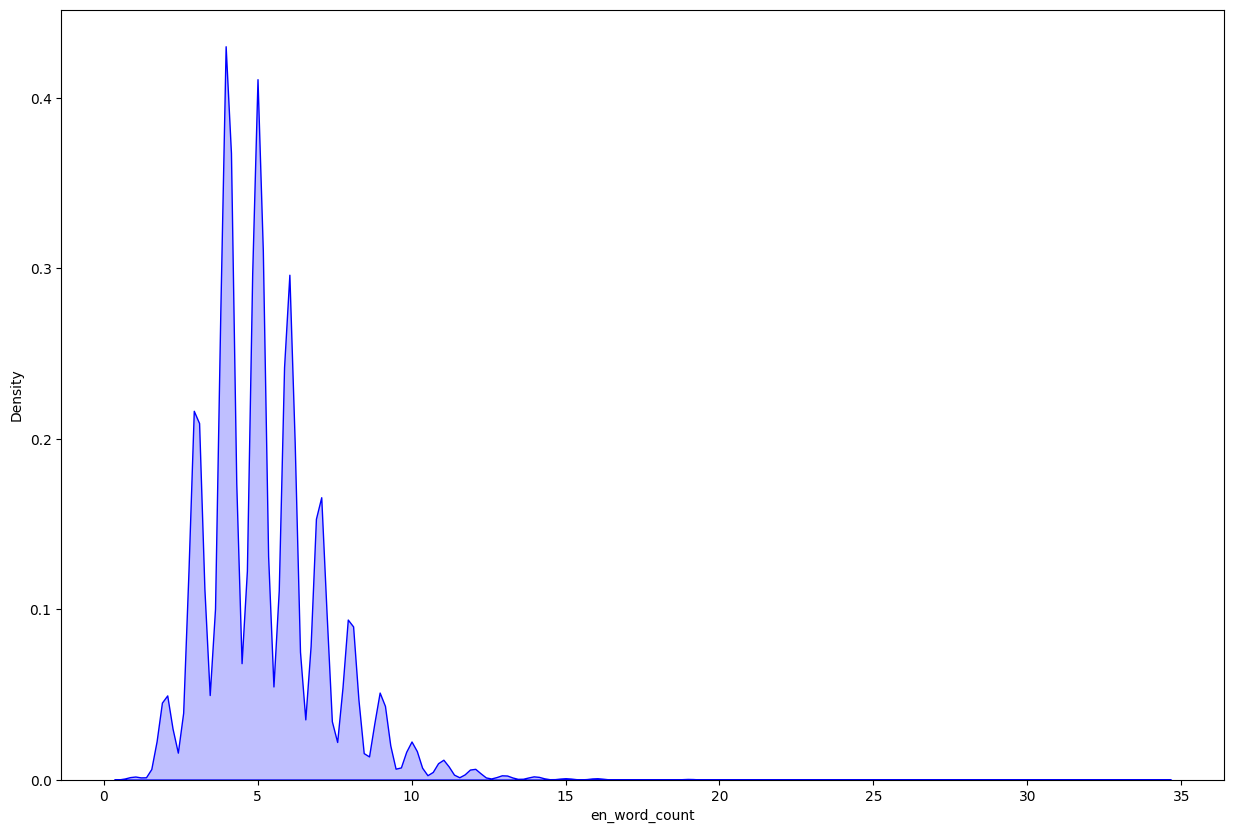

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.en_word_count, shade=True, color='blue', label='Real')


<Axes: xlabel='mar_word_count', ylabel='Density'>

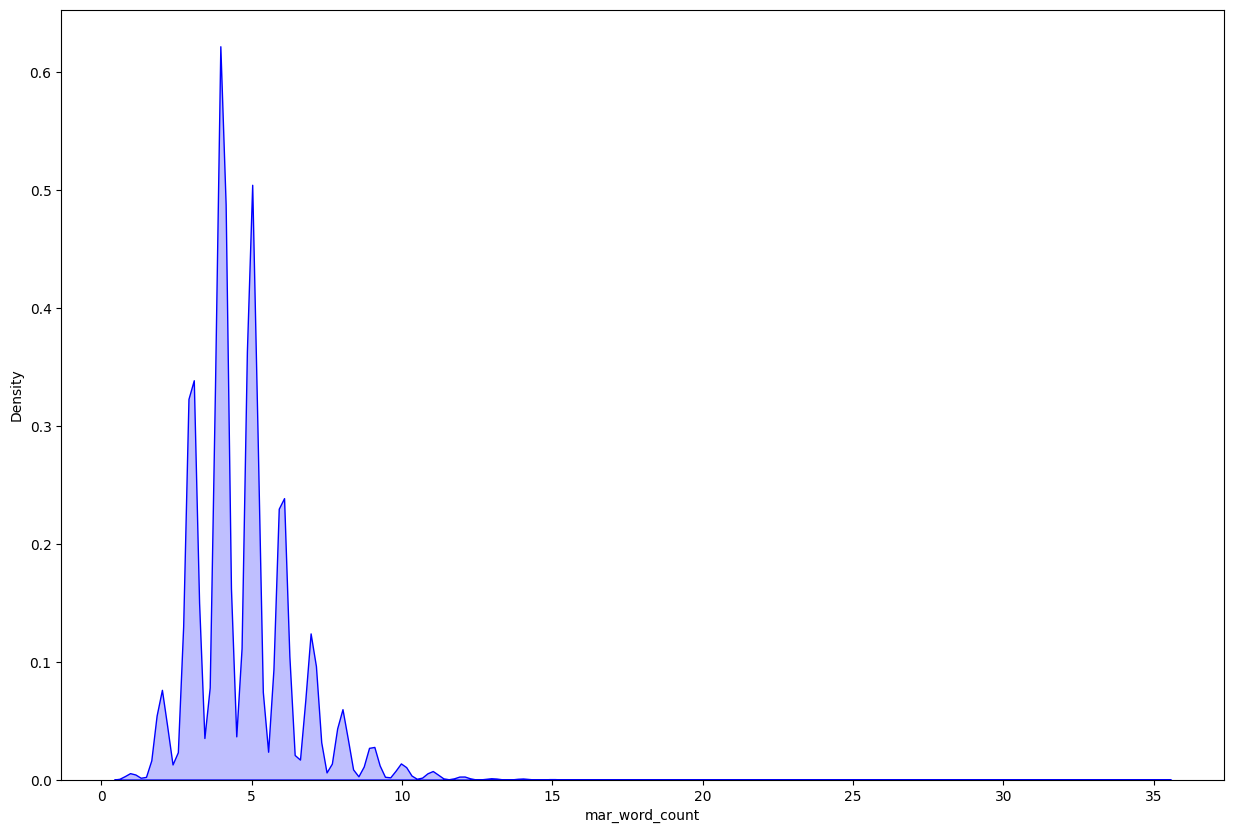

In [ ]:
plt.figure(figsize=(15,10))
sns.kdeplot(x=df.mar_word_count, shade=True, color='blue', label='Real')


In [ ]:
max(df.en_word_count)

34

In [ ]:
max(df.mar_word_count)


35

<Axes: ylabel='Density'>

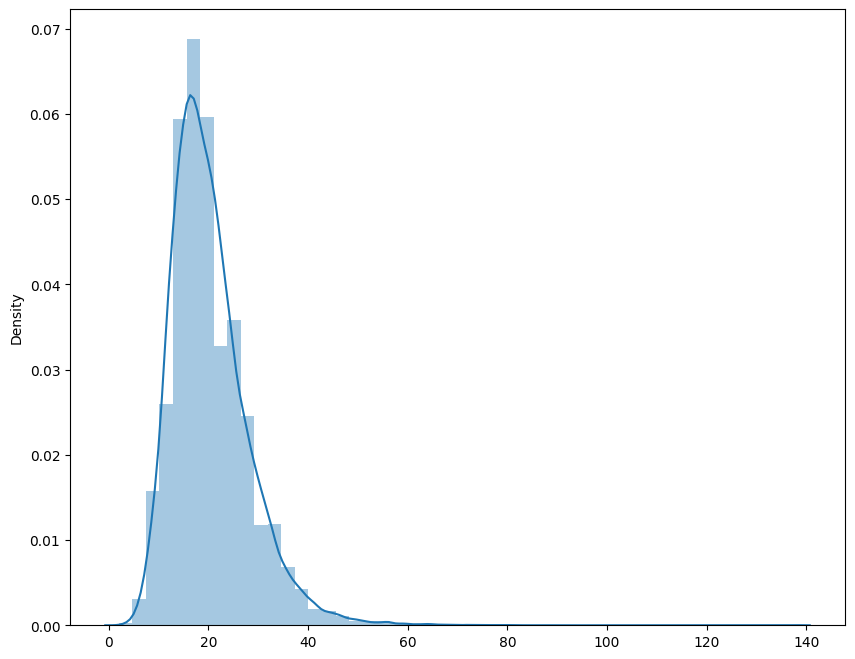

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.en_char_count)

<Axes: ylabel='Density'>

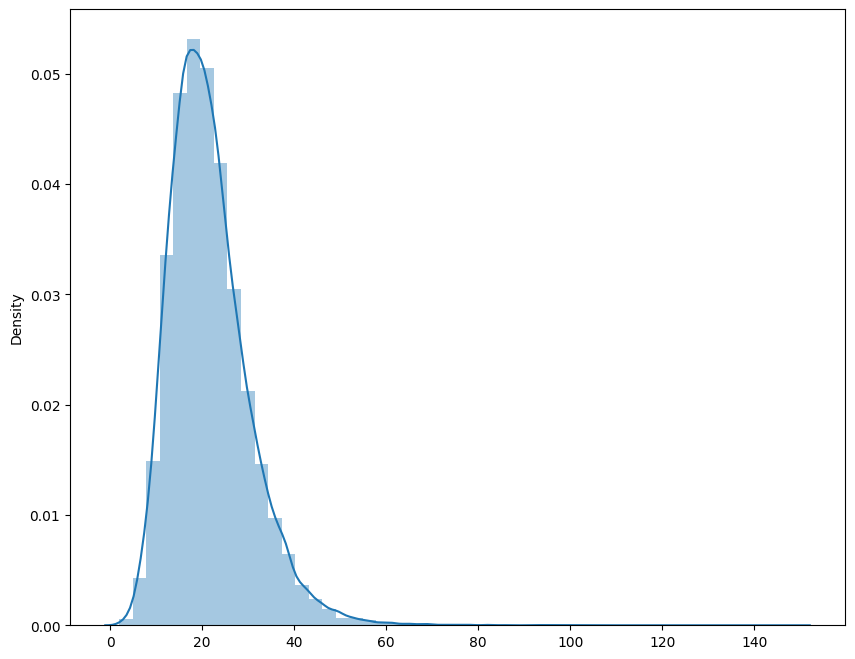

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(x=df.mar_char_count)

In [ ]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

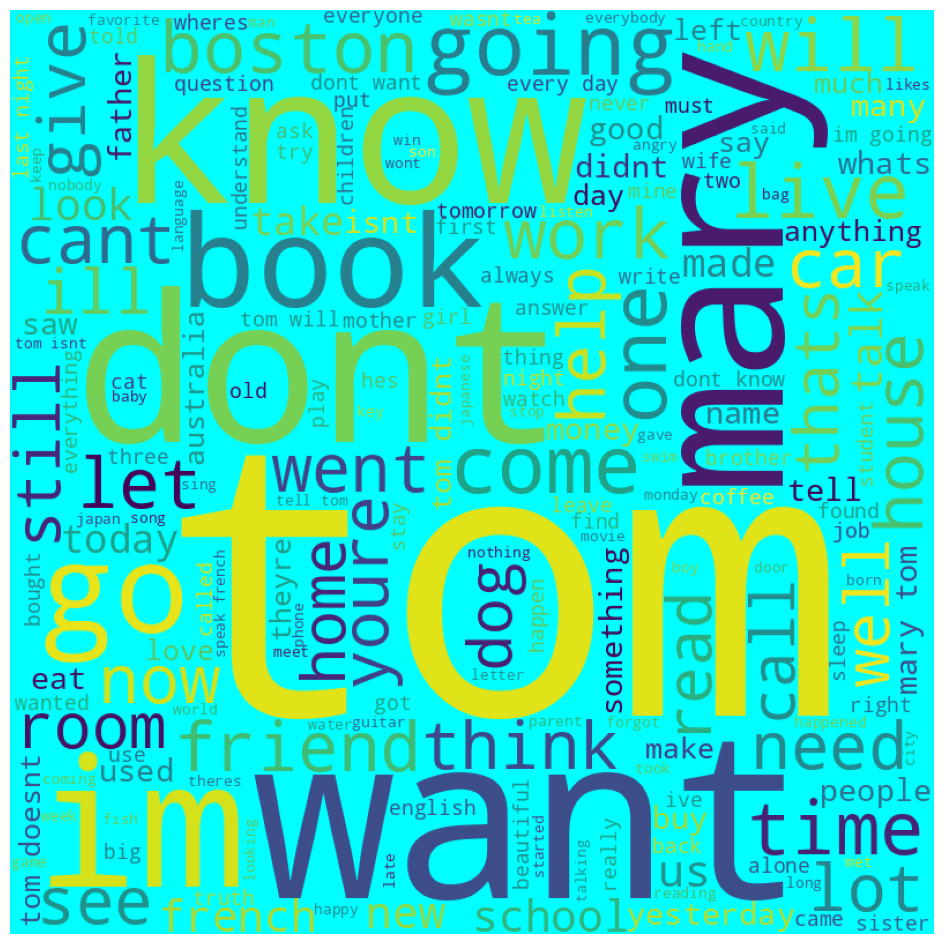

In [ ]:
plot_word_cloud(df.English)

In [ ]:
len(df)

46995

In [ ]:
df.to_csv("cleaned.csv",index=None)

>**Conclusion**

* 46995 samples of sentenses
* Min len of both eng and mar sentence is 1
* Max len of both is 35 -- this will help for padding
* And we cleaned text removed all punctuatuins digits and expanded contractions in this notebook

### Training Bidirectional LSTM With Attention

In [ ]:
import pandas as pd
import numpy as np
import string

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from sklearn.model_selection import train_test_split
import re
import os

In [ ]:
df = pd.read_csv("/kaggle/working/cleaned.csv")
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,2,3
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,4,3


In [ ]:
df.sample(10)

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
35794,theres no reason to get angry,रागवण्यासाठी काहीही गरज नाहीये,6,4,27,24
38136,tom doesnt know i cant do that,मला तसं करता येत नाही हे टॉमला माहीत नाहीये,7,9,35,24
41916,he still comes to see me now and then,तो अजूनही अधूनमधून मला भेटायला येतो,9,6,30,29
3191,did you get it,तुम्हाला ते समजलं का,4,4,17,11
863,who talked,कोण बोललं,2,2,8,9
22883,that boy is very clever,तो मुलगा खूप हुशार आहे,5,5,18,19
46457,otto lilienthal was a german engineer and entr...,ऑट्टो लिलिएन्थाल एक जर्मन तंत्रज्ञ व उद्योजक होता,8,8,42,47
12511,dont phone her now,तिला सध्या फोन करू नका,4,5,18,15
12823,i can take tom home,मी टॉमला घरी घेऊन जाऊ शकते,5,6,21,15
45411,washington was the most famous man in america,वॉशिंग्टन हा अमेरिकेत सर्वात प्रसिद्ध माणूस होता,8,7,42,38


**Adding start and end tokens to target sentecnes**
* This mechanism aids the model in recognizing the commencement and conclusion of a sentence, enabling the decoder to effectively manage sentences of varying lengths compared to the encoder.

In [ ]:
df['Marathi'] =df.Marathi.apply(lambda x: 'sos '+ x + ' eos')


In [ ]:
df.head()

,English,Marathi,en_word_count,mar_word_count,mar_char_count,en_char_count
0,go,sos जा eos,1,1,2,2
1,run,sos पळ eos,1,1,2,3
2,run,sos धाव eos,1,1,3,3
3,run,sos पळा eos,1,1,3,3
4,run,sos धावा eos,1,1,4,3


In [ ]:
eng_texts = df.English.to_list()
mar_texts = df.Marathi.to_list()

**Tokenization**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
def tokenize_sent(text):
  '''
  Take list on texts as input and
  returns its tokenizer and enocded text
  '''
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(text)

  return tokenizer, tokenizer.texts_to_sequences(text)

In [ ]:
# Tokenize english and marathi sentences
eng_tokenizer, eng_encoded= tokenize_sent(text= eng_texts)
mar_tokenizer, mar_encoded= tokenize_sent(text= mar_texts)

In [ ]:
eng_encoded[100], mar_encoded[100]

([83, 64], [1, 318, 65, 129, 2])

In [ ]:
eng_index_word = eng_tokenizer.index_word
eng_word_indec= eng_tokenizer.word_index

In [ ]:
list(eng_index_word.items())[:5]

[(1, 'tom'), (2, 'i'), (3, 'you'), (4, 'the'), (5, 'to')]

In [ ]:
list(eng_word_indec.items())[:5]

[('tom', 1), ('i', 2), ('you', 3), ('the', 4), ('to', 5)]

In [ ]:
ENG_VOCAB_SIZE = len(eng_tokenizer.word_counts)+1
ENG_VOCAB_SIZE

5836

In [ ]:
mar_index_word = mar_tokenizer.index_word
mar_word_index= mar_tokenizer.word_index

In [ ]:
print(list(mar_index_word.items())[5:11])
print(list(mar_word_index.items())[5:11])

[(6, 'मला'), (7, 'टॉम'), (8, 'नाही'), (9, 'तू'), (10, 'ते'), (11, 'टॉमला')]
[('मला', 6), ('टॉम', 7), ('नाही', 8), ('तू', 9), ('ते', 10), ('टॉमला', 11)]


In [ ]:
MAR_VOCAB_SIZE=len(mar_tokenizer.word_counts)+1
MAR_VOCAB_SIZE

14386

**Padding**
* Making input sentences as max length of input sentence with padding zero
* Same for target make them as max length of target sentence.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_eng_len = 0
for i in range(len(eng_encoded)):
  if len(eng_encoded[i]) > max_eng_len:
    max_eng_len= len(eng_encoded[i])
print(max_eng_len)

max_mar_len = 0
for i in range(len(mar_encoded)):
  if len(eng_encoded[i]) > max_mar_len:
    max_mar_len= len(mar_encoded[i])

print(max_mar_len)

34
37


In [ ]:
eng_padded = pad_sequences(eng_encoded, maxlen=max_eng_len
                           , padding='post')
mar_padded = pad_sequences(mar_encoded, maxlen=max_mar_len, padding='post')

In [ ]:
eng_padded[0] ,  mar_padded[0]

(array([37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       dtype=int32),
 array([  1, 747,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32))

In [ ]:
eng_padded.shape , mar_padded.shape

((46995, 34), (46995, 37))

**To array**



In [ ]:
eng_padded= np.array(eng_padded)
mar_padded= np.array(mar_padded)

In [ ]:
# data splitting

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(eng_padded, mar_padded, test_size=0.1, random_state=0)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((42295, 34), (4700, 34), (42295, 37), (4700, 37))

### Modelling

In [ ]:
!pip install attention

In [ ]:
!pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18895 sha256=9be0ec90b7f95563b1c98d7494af1cd253359c09e97cf46ab49882be54ec7102
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


In [ ]:
!tensorflow==2.9.1

**Note** Based on this paper
>* https://arxiv.org/pdf/1409.0473.pdf

In [ ]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

logger = tf.get_logger()

class AttentionLayer(tf.keras.layers.Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs

        logger.debug(f"encoder_out_seq.shape = {encoder_out_seq.shape}")
        logger.debug(f"decoder_out_seq.shape = {decoder_out_seq.shape}")

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            logger.debug("Running energy computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_full_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim

            logger.debug(f"U_a_dot_h.shape = {U_a_dot_h.shape}")

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)

            logger.debug(f"Ws_plus_Uh.shape = {Ws_plus_Uh.shape}")

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            logger.debug(f"ei.shape = {e_i.shape}")

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            logger.debug("Running attention vector computation step")

            if not isinstance(states, (list, tuple)):
                raise TypeError(f"States must be an iterable. Got {states} of type {type(states)}")

            encoder_full_seq = states[-1]

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_full_seq * K.expand_dims(inputs, -1), axis=1)

            logger.debug(f"ci.shape = {c_i.shape}")

            return c_i, [c_i]

        # we don't maintain states between steps when computing attention
        # attention is stateless, so we're passing a fake state for RNN step function
        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e], constants=[encoder_out_seq]
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c], constants=[encoder_out_seq]
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Concatenate, Dropout
from tensorflow.keras import Input, Model
# from attention_keras.src.layers.attention import AttentionLayer

# attention_layer = AttentionLayer(name='attention_layer')



In [ ]:
# Encoder

encoder_inputs = Input(shape=(max_eng_len,))
enc_emb = Embedding(ENG_VOCAB_SIZE, 1024)(encoder_inputs)

# Bidirectional lstm layer
enc_lstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True))
encoder_outputs1, forw_state_h, forw_state_c, back_state_h, back_state_c = enc_lstm1(enc_emb)

final_enc_h = Concatenate()([forw_state_h,back_state_h])
final_enc_c = Concatenate()([forw_state_c,back_state_c])

encoder_states =[final_enc_h, final_enc_c]

# Set up the decoder.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(MAR_VOCAB_SIZE, 1024)
dec_emb = dec_emb_layer(decoder_inputs)
#LSTM using encoder_states as initial state
decoder_lstm = LSTM(512, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

#Attention Layer
attention_layer = AttentionLayer(name="attension_layer")
attention_result, attention_weights = attention_layer([encoder_outputs1, decoder_outputs])

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_result])

#Dense layer
decoder_dense = Dense(MAR_VOCAB_SIZE, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat_input)


# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 34)]                 0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 34, 1024)             5976064   ['input_3[0][0]']             
                                                                                                  
 input_4 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 bidirectional_1 (Bidirecti  [(None, 34, 512),            2623488   ['embedding_2[0][0]']         
 onal)                        (None, 256),                                                  

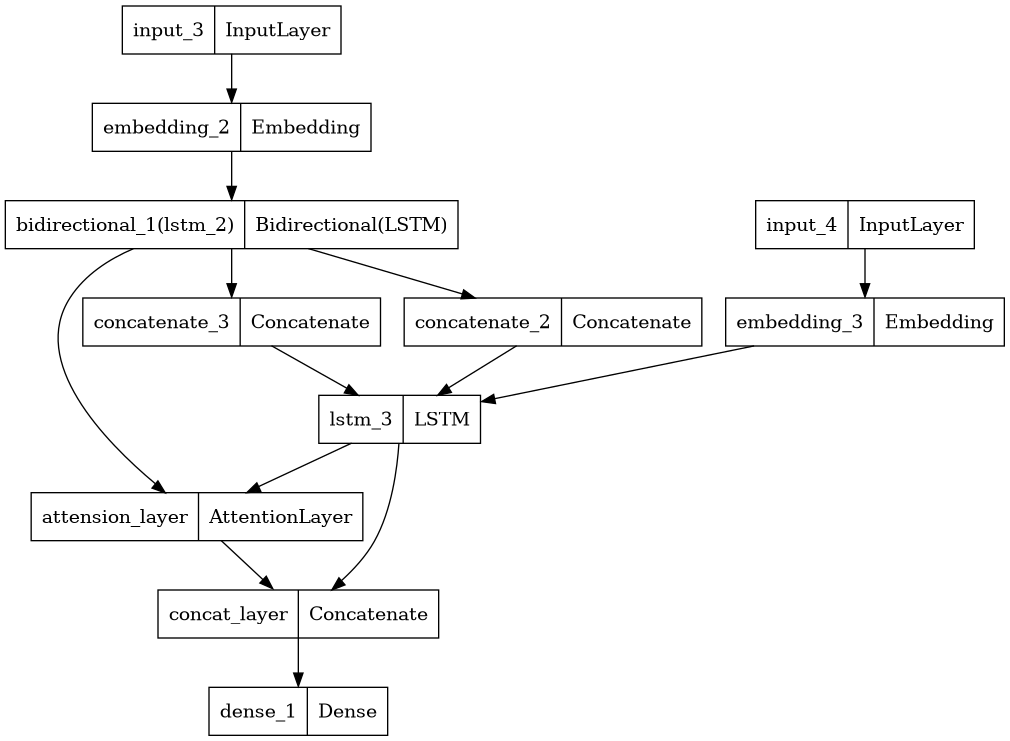

In [ ]:
from keras.utils import plot_model

plot_model(model)

In [ ]:
model.save("attention_model.keras")


In [ ]:
import keras
model = keras.models.load_model('attention_model.keras')

* **IMP note**

*if loss categorical crossentropy used then shapes incompatible error will occcur we have to use sparse_categorical_crossentropy*

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from pathlib import Path
Path("/kaggle/working/models/Attension/checkpoints/model_main/").mkdir(parents=True, exist_ok=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/kaggle/working/models/Attension/checkpoints/model_main/", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
# Training
encoder_input_data = X_train
# To make same as target data skip last number which is just padding
decoder_input_data = y_train[:,:-1]
# Decoder target data has to be one step ahead so we are taking from 1 as mestoined in keras docs
decoder_target_data =  y_train[:,1:]

# Testing
encoder_input_test = X_test
decoder_input_test = y_test[:,:-1]
decoder_target_test=  y_test[:,1:]

In [ ]:
EPOCHS= 50

In [ ]:
%%time
history = model.fit([encoder_input_data, decoder_input_data],decoder_target_data,
                    epochs=EPOCHS,
                    batch_size=128,
                    validation_data = ([encoder_input_test, decoder_input_test],decoder_target_test),
                    callbacks= callbacks_list)

Epoch 1/50
331/331 [==============================] - 88s 265ms/step - loss: 0.5441 - accuracy: 0.9094 - val_loss: 0.4983 - val_accuracy: 0.9189
Epoch 2/50
331/331 [==============================] - 89s 268ms/step - loss: 0.3652 - accuracy: 0.9309 - val_loss: 0.3926 - val_accuracy: 0.9323
Epoch 3/50
331/331 [==============================] - 88s 267ms/step - loss: 0.2375 - accuracy: 0.9479 - val_loss: 0.3348 - val_accuracy: 0.9415
Epoch 4/50
331/331 [==============================] - 89s 269ms/step - loss: 0.1592 - accuracy: 0.9606 - val_loss: 0.3098 - val_accuracy: 0.9463
Epoch 5/50
331/331 [==============================] - 88s 267ms/step - loss: 0.1136 - accuracy: 0.9695 - val_loss: 0.3000 - val_accuracy: 0.9489
Epoch 6/50
331/331 [==============================] - 87s 264ms/step - loss: 0.0874 - accuracy: 0.9751 - val_loss: 0.2956 - val_accuracy: 0.9505
Epoch 7/50
331/331 [==============================] - 89s 269ms/step - loss: 0.0716 - accuracy: 0.9784 - val_loss: 0.2923 - val_ac

**Saving weights**

In [ ]:
from pathlib import Path
Path("/kaggle/working/models/Attension/weights/model_main/").mkdir(parents=True, exist_ok=True)

In [ ]:
model.save_weights("/kaggle/working/models/Attension/weights/model_main/model_main.h5")

In [ ]:
# /kaggle/working/models/Attension/weights/model_1/checkpoint

In [ ]:
model.load_weights("/kaggle/working/models/Attension/weights/model_main/model_main.h5")

### Inference model


In [ ]:
encoder_model = Model(encoder_inputs, outputs = [encoder_outputs1, final_enc_h, final_enc_c])

decoder_state_h = Input(shape=(512,))
decoder_state_c = Input(shape=(512,))
decoder_hidden_state_input = Input(shape=(34,512))

dec_states = [decoder_state_h, decoder_state_c]

dec_emb2 = dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=dec_states)

# Attention inference
attention_result_inf, attention_weights_inf = attention_layer([decoder_hidden_state_input, decoder_outputs2])

decoder_concat_input_inf = Concatenate(axis=-1, name='concat_layer')([decoder_outputs2, attention_result_inf])

dec_states2= [state_h2, state_c2]

decoder_outputs2 = decoder_dense(decoder_concat_input_inf)

decoder_model= Model(
                    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_h, decoder_state_c],
                     [decoder_outputs2]+ dec_states2)

**Model will predict numbers  we'll have to convert them to words of language**

In [ ]:
def get_predicted_sentence(input_seq):
    # Encode the input as state vectors.
    enc_output, enc_h, enc_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = mar_word_index['sos']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
          break
        else:
            # convert max index number to marathi word
            sampled_char = mar_index_word[sampled_token_index]

        if (sampled_char!='end'):
            # aapend it ti decoded sent
            decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length or find stop token.
        if (sampled_char == 'eos' or len(decoded_sentence.split()) >= 36):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        # Update states
        enc_h, enc_c = h, c

    return decoded_sentence

### Converting x and y back to words-sentences


In [ ]:
def get_marathi_sentence(input_sequence):
    sentence =''
    for i in input_sequence:
      if i!=0 :
        sentence =sentence +mar_index_word[i]+' '
    return sentence

def get_english_sentence(input_sequence):
    sentence =''
    for i in input_sequence:
      if i!=0:
        sentence =sentence +eng_index_word[i]+' '
    return sentence

### MOdel results

In [ ]:
len(X_test)

4700

In [ ]:
for i in np.random.randint(10, 1000, size=15):
  print("English Sentence:",get_english_sentence(X_test[i]))

  # Before passing input it has to be reshape as following
  print("Actual Marathi Sentence:",get_marathi_sentence(y_test[i])[4:-4])
  print("Predicted Marathi Translation:",get_predicted_sentence(X_test[i].reshape(1,34))[:-4])
  print("---------------------------------------------------------------------------------------- \n \n")

English Sentence: i like french 
Actual Marathi Sentence: मला फ्रेंच आवडते 
1/1 [==============================] - 0s 22ms/step
Predicted Marathi Translation:  मला फ्रेंच आवडते
---------------------------------------------------------------------------------------- 
 

English Sentence: your cell phones not working 
Actual Marathi Sentence: तुझा सेलफोन चालत नाहीये 
1/1 [==============================] - 0s 20ms/step
Predicted Marathi Translation:  तुमचा सेलफोन चालत नाहीये
---------------------------------------------------------------------------------------- 
 

English Sentence: i lost my phone 
Actual Marathi Sentence: मी माझा फोन हरवला 
1/1 [==============================] - 0s 21ms/step
Predicted Marathi Translation:  मी माझा फोन केला
---------------------------------------------------------------------------------------- 
 

English Sentence: are you a vampire 
Actual Marathi Sentence: तू व्हॅम्पायर आहेस का 
1/1 [==============================] - 0s 21ms/step
Predicted Marathi Tr

In [ ]:
# Saving working weights to local

In [ ]:
# !zip -r attention.zip /kaggle/working/models/Attension

  adding: kaggle/working/models/Attension/ (stored 0%)
  adding: kaggle/working/models/Attension/weights/ (stored 0%)
  adding: kaggle/working/models/Attension/weights/model_1/ (stored 0%)
  adding: kaggle/working/models/Attension/weights/model_1/model.h5 (deflated 8%)
  adding: kaggle/working/models/Attension/weights/model_1/checkpoint (deflated 34%)
  adding: kaggle/working/models/Attension/weights/model_1/.data-00000-of-00001 (deflated 8%)
  adding: kaggle/working/models/Attension/weights/model_1/.index (deflated 66%)
  adding: kaggle/working/models/Attension/weights/model_main/ (stored 0%)
  adding: kaggle/working/models/Attension/weights/model_main/model_main.h5 (deflated 8%)
  adding: kaggle/working/models/Attension/checkpoints/ (stored 0%)
  adding: kaggle/working/models/Attension/checkpoints/model_1/ (stored 0%)
  adding: kaggle/working/models/Attension/checkpoints/model_1/saved_model.pb (deflated 90%)
  adding: kaggle/working/models/Attension/checkpoints/model_1/fingerprint.pb

In [ ]:
# from IPython.display import FileLink
# FileLink(r"attention.zip")

/kaggle/working/attention.zip

In [ ]:
!zip -r main_model.zip /kaggle/working/models/Attension/weights/model_main

  adding: kaggle/working/models/Attension/weights/model_main/ (stored 0%)
  adding: kaggle/working/models/Attension/weights/model_main/model_main.h5 (deflated 8%)


In [ ]:
from IPython.display import FileLink
FileLink(r"main_model.zip")

/kaggle/working/main_model.zip

In [ ]:
/kaggle/working/models/Attension/weights/model_main